In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content//medical_cost_insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Check for missing values


In [ ]:
df.isnull().sum()


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.shape

(1338, 7)

In [39]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
categorical_columns = ['sex', 'smoker', 'region']
df[categorical_columns] = encoder.fit_transform(df[categorical_columns])

In [40]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


<ipython-input-43-70dea408e520>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-43-70dea408e520>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-43-70dea408e520>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in s

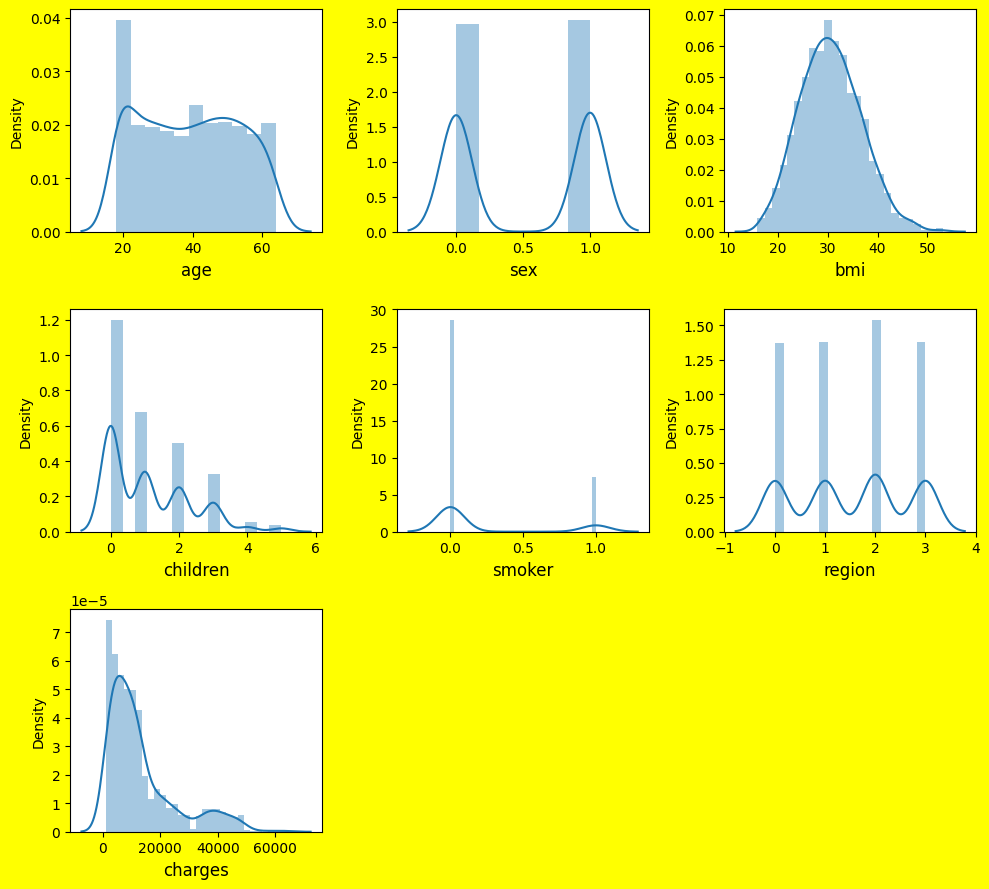

In [43]:
plt.figure(figsize=(10,9),facecolor='yellow')
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=12)
    plotnumber +=1
plt.tight_layout()

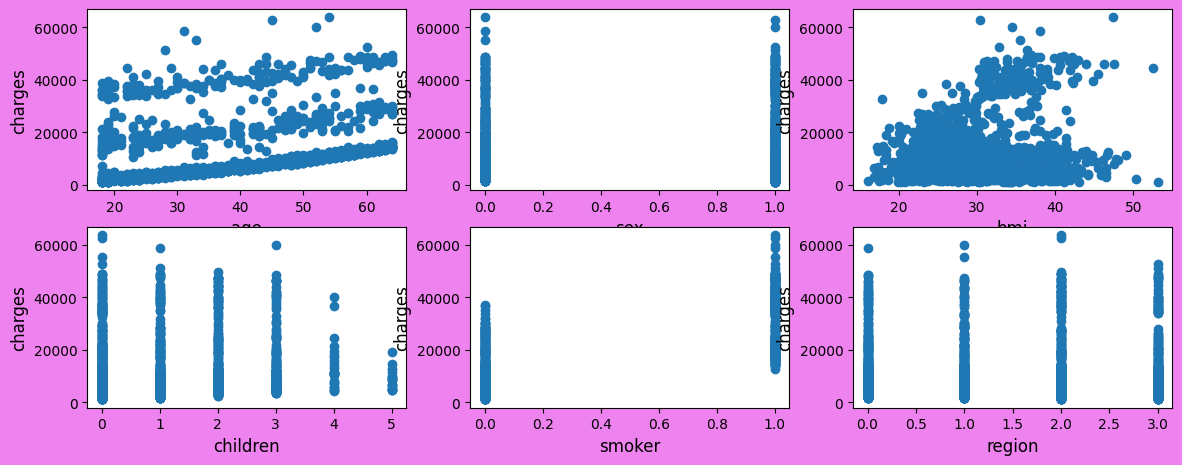

In [45]:
y=df['charges']  #Labels
x=df.drop(columns=['charges']) #Features

plt.figure(figsize=(14,8),facecolor='violet')
plotnumber=1
for column in x:
    if plotnumber <=6:
        ax=plt.subplot(3,3,plotnumber)   #Defines axis to the columns
        plt.scatter(x[column],y)         #scatter plot
        plt.xlabel(column , fontsize=12)
        plt.ylabel('charges',fontsize=12)
    plotnumber +=1
plt.show()

In [47]:
scaler = StandardScaler()
x_scaler=scaler.fit_transform(x)

In [48]:
x_scaler

array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367,  1.97058663,
        -0.46691549]])

In [49]:
x_scaler.shape

(1338, 6)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaler,i) for i in range (x_scaler.shape[1])]

vif['Features']=x.columns

In [53]:
vif

,vif,Features
0,1.015394,age
1,1.008889,sex
2,1.040608,bmi
3,1.002482,children
4,1.006466,smoker
5,1.025966,region


In [56]:
x_train,x_test,y_train,y_test =train_test_split(x_scaler,y,test_size=0.2,random_state=0)
x_scaler.shape


(1338, 6)

In [57]:
x_train.shape

(1070, 6)

In [58]:

lm=LinearRegression()

In [59]:

lm.fit(x_train,y_train)

LinearRegression()

In [60]:
df.tail(2)

,age,sex,bmi,children,smoker,region,charges
1336,21,0.0,25.80,0,0.0,3.0,2007.9450
1337,61,0.0,29.07,0,1.0,1.0,29141.3603


In [62]:
print("Charges : ",lm.predict(scaler.transform([[21,0,25.80,0,0.0,3]])))

Charges :  [1279.10679357]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [63]:
print("Charges : ",lm.predict(scaler.transform([[61,0,29.07,0,1,1]])))

Charges :  [36658.55407773]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [64]:
lm.score(x_train,y_train)

0.7368306228430945

In [65]:
lm.score(x_test,y_test)

0.799874714544996

In [66]:

x_graph=lm.predict(x_test)

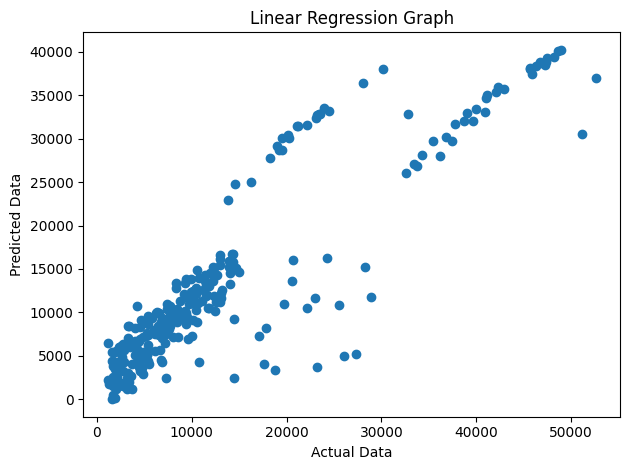

In [67]:
plt.scatter(y_test,x_graph)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Linear Regression Graph')
plt.tight_layout()

In [68]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_absolute_error(y_test,x_graph)

3930.3332739011403

In [69]:

mean_squared_error(y_test,x_graph)

31845929.134159423

In [70]:

np.sqrt(mean_squared_error(y_test,x_graph))

5643.2197488809015